# Coding Exercises (Part 14)

## Financial Indexes

### Exercise 14: Creating and Analyzing Stock Indexes

Now, you will have the opportunity to analyze your own dataset. <br>
__Follow the instructions__ and insert your code! You are either requested to 
- Complete the Code and __Fill in the gaps__. Gaps are marked with "__---__" and are __placeholders__ for your code fragment 
- Write Code completely __on your own__ 

In some exercises, you will find questions that can only be answered, if your code is correct and returns the right output! The correct answer is provided below your coding cell. There you can check whether your code is correct.

If you need a hint, check the __Hints Section__ at the end of this Notebook. Exercises and Hints are numerated accordingly.

If you need some further help or if you want to check your code, you can also check the __solutions notebook__.

### Have Fun!

--------------------------------------------------------------------------------------------------------------

## Option 1: Self_guided

Import the us stocks dataset (__us_stocks.csv__) and select the 5-Year period from __31-12-2013__ (incl.) until __31-12-2018__ (incl.). Save the DataFrame in the variable __stocks__ and work through the next questions with this DataFrame!

__Create__ the __Price-weighted__ (Price Return) Index (starting at a Base Value of 100) !

__Create__ the __Value-weighted__ (Price Return) Index (starting at a Base Value of 100)! __Import__ the __listings_clean.csv__ dataset for calculating the __Market Caps__! Use the __simplified assumption__ that the amount of __shares outstanding do not change__ over time!

__Plot__ PWI and VWI and __compare__!

------------------------

## Option 2: Guided and Instructed

# STOP HERE, IF YOU WANT TO DO THE EXERCISE ON YOUR OWN!

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [1]:
#run the cell!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

pd.options.display.float_format = '{:.2f}'.format

135. __Import__ the __us_stocks.csv__ file and select the __appropriate Price Data__ to create __Price Return Indexes__! (Close vs. Adj Close) <br> __Assign__ the variable __stocks__! __Fill in the gaps!__

In [2]:
stocks = pd.read_csv("us_stocks.csv", header = [0,1], index_col = [0], parse_dates = [0])["Close"]

136. __Select__ the 5-Year Period from __2014__ (incl.) until __2018__ (incl.) and __overwrite stocks__! (Hint: Start with "2013-12-31")

In [3]:
stocks = stocks.loc["2013-12-31":"2018-12-31"]

In [4]:
#run the cell!
stocks.head()

,AXP,FB,INTC,MCD,PG,WMT
Date,,,,,,
2013-12-31,90.73,54.65,25.96,97.03,81.41,78.69
2014-01-02,89.45,54.71,25.79,96.41,80.54,78.91
2014-01-03,89.74,54.56,25.78,96.54,80.45,78.65
2014-01-06,89.70,57.20,25.46,95.85,80.64,78.21
2014-01-07,89.36,57.92,25.59,96.38,81.42,78.45


In [5]:
#run the cell!
stocks.tail()

,AXP,FB,INTC,MCD,PG,WMT
Date,,,,,,
2018-12-21,91.33,124.95,44.84,174.15,90.97,87.13
2018-12-24,89.50,124.06,43.59,170.28,87.36,85.82
2018-12-26,93.84,134.18,46.19,174.03,90.09,90.41
2018-12-27,94.68,134.52,46.36,175.71,92.02,91.59
2018-12-28,94.42,133.20,46.75,175.56,91.18,92.13


137. __Normalize__ stocks to a __Base Value of 100__ and save the resulting DataFrame in the variable __norm__!

In [6]:
norm = stocks.div(stocks.iloc[0]).mul(100)
norm

,AXP,FB,INTC,MCD,PG,WMT
Date,,,,,,
2013-12-31,100.00,100.00,100.00,100.00,100.00,100.00
2014-01-02,98.59,100.11,99.35,99.36,98.93,100.28
2014-01-03,98.91,99.84,99.31,99.50,98.82,99.95
2014-01-06,98.86,104.67,98.07,98.78,99.05,99.39
2014-01-07,98.49,105.98,98.57,99.33,100.01,99.69
...,...,...,...,...,...,...
2018-12-21,100.66,228.64,172.73,179.48,111.74,110.73
2018-12-24,98.64,227.01,167.91,175.49,107.31,109.06
2018-12-26,103.43,245.53,177.93,179.36,110.66,114.89


138. __Plot__ norm! (figsize = (15, 8))

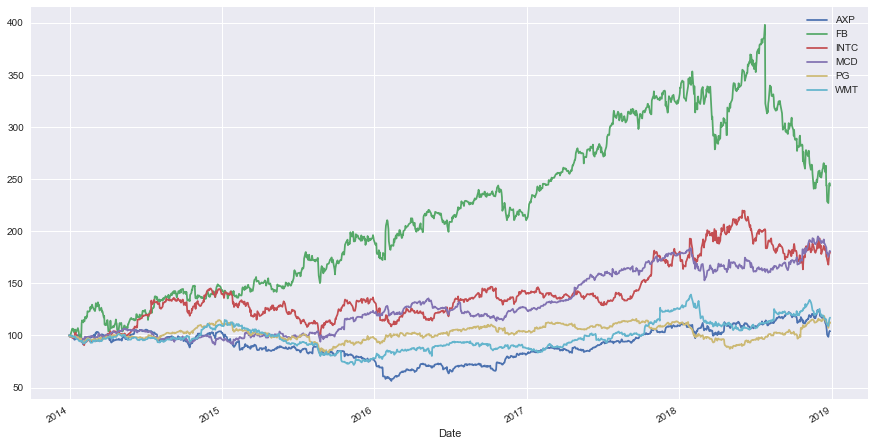

In [7]:
norm.plot(figsize = (15, 8))
plt.show()

139. __Create__ the __Price-weighted__ Index (Price Return) with Base Value __100__ and __add__ the new column __"PWI"__ to the the __norm__ DataFrame! __Fill in the gaps!__ 

In [8]:
norm["PWI"] = stocks.sum(axis = 1).div(stocks.sum(axis = 1)[0]).mul(100)

In [9]:
#run the cell!
norm.head()

,AXP,FB,INTC,MCD,PG,WMT,PWI
Date,,,,,,,
2013-12-31,100.00,100.00,100.00,100.00,100.00,100.00,100.00
2014-01-02,98.59,100.11,99.35,99.36,98.93,100.28,99.38
2014-01-03,98.91,99.84,99.31,99.50,98.82,99.95,99.36
2014-01-06,98.86,104.67,98.07,98.78,99.05,99.39,99.67
2014-01-07,98.49,105.98,98.57,99.33,100.01,99.69,100.15


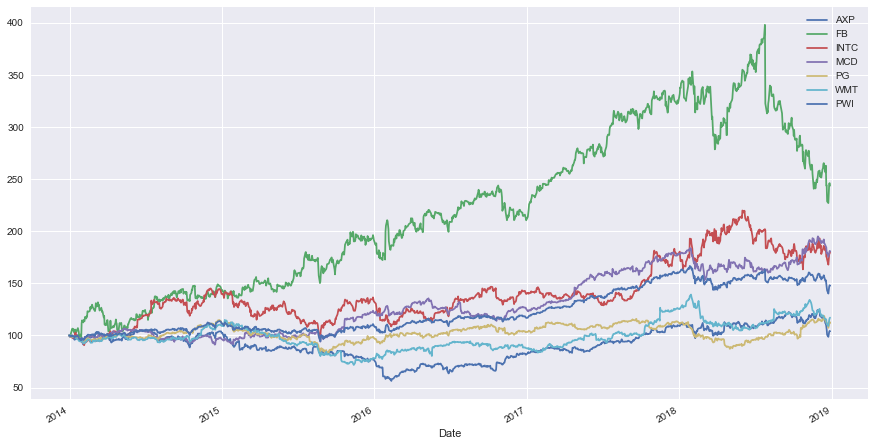

In [10]:
#run the cell!
norm.plot(figsize = (15, 8))
plt.show()

## Create the Value-weighted Index (Price Return) and follow the next steps:

In [11]:
# run the cell!
stocks.head()

,AXP,FB,INTC,MCD,PG,WMT
Date,,,,,,
2013-12-31,90.73,54.65,25.96,97.03,81.41,78.69
2014-01-02,89.45,54.71,25.79,96.41,80.54,78.91
2014-01-03,89.74,54.56,25.78,96.54,80.45,78.65
2014-01-06,89.70,57.20,25.46,95.85,80.64,78.21
2014-01-07,89.36,57.92,25.59,96.38,81.42,78.45


In [12]:
# run the cell!
norm.head()

,AXP,FB,INTC,MCD,PG,WMT,PWI
Date,,,,,,,
2013-12-31,100.00,100.00,100.00,100.00,100.00,100.00,100.00
2014-01-02,98.59,100.11,99.35,99.36,98.93,100.28,99.38
2014-01-03,98.91,99.84,99.31,99.50,98.82,99.95,99.36
2014-01-06,98.86,104.67,98.07,98.78,99.05,99.39,99.67
2014-01-07,98.49,105.98,98.57,99.33,100.01,99.69,100.15


In [13]:
# run the cell!
listings = pd.read_csv("listings_clean.csv", index_col = "Symbol")

In [14]:
#run the cell!
listings.head()

,Exchange,Name,Last_Price,Market_Cap,IPO_Year,Sector,Industry
Symbol,,,,,,,
A,NYSE,"Agilent Technologies, Inc.",81.68,25934696179.92,1999,Capital Goods,Biotechnology: Laboratory Analytical Instruments
AA,NYSE,Alcoa Corporation,29.15,5407809589.60,2016,Basic Industries,Aluminum
AABA,NASDAQ,Altaba Inc.,75.39,42781131315.30,1969,Technology,EDP Services
AAC,NYSE,"AAC Holdings, Inc.",2.16,53141086.80,2014,Health Care,Medical Specialities
AAL,NASDAQ,"American Airlines Group, Inc.",34.02,15276869742.96,1969,Transportation,Air Freight/Delivery Services


140. __Slice listings__ for our __six stocks__ and the columns __"Last_Price"__ and __"Market_Cap"__! __Overwrite listings__! __Fill in the gaps!__

In [15]:
listings = listings.loc[stocks.columns, ["Last_Price", "Market_Cap"]]

In [16]:
#run the cell!
listings

,Last_Price,Market_Cap
Symbol,,
AXP,110.16,92396447733.60
FB,177.82,507496466236.00
INTC,55.75,250800765641.50
MCD,189.22,144813345561.04
PG,104.65,261790316546.85
WMT,99.60,285820549308.00


141. __Calculate__ the number of __shares outstanding__ and __create__ the new column __"Shares"__!

In [17]:
listings["Shares"] = listings.Market_Cap.div(listings.Last_Price)

In [18]:
#run the cell!
listings

,Last_Price,Market_Cap,Shares
Symbol,,,
AXP,110.16,92396447733.60,838747710.00
FB,177.82,507496466236.00,2853989800.00
INTC,55.75,250800765641.50,4498668442.00
MCD,189.22,144813345561.04,765317332.00
PG,104.65,261790316546.85,2501579709.00
WMT,99.60,285820549308.00,2869684230.00


142. __Calculate__ the __Market Cap__ for each stock on each Timestamp and __save__ the resulting DataFrame in the variable __mcap__! __Fill in the gaps!__ <br>
(Hint: We use the __simplified assumption__ that the amount of shares outstanding does not change over time)  

In [19]:
mcap = stocks.mul(listings.Shares, axis = "columns")

In [20]:
#run the cell!
mcap.head()

,AXP,FB,INTC,MCD,PG,WMT
Date,,,,,,
2013-12-31,76099582244.54,155970548277.98,116785428255.65,74258739958.64,203653614116.01,225815457798.07
2014-01-02,75025980143.26,156141779104.01,116020663617.85,73784247039.39,201477232264.44,226446794068.04
2014-01-03,75269217817.90,155713686341.99,115975676933.43,73883735996.60,201252080084.31,225700670428.87
2014-01-06,75235667070.76,163248219413.99,114536094034.65,73355664741.57,201727385232.18,224438000758.62
2014-01-07,74950496204.35,165303083508.02,115120925430.78,73761282162.21,203678614903.62,225126719234.45


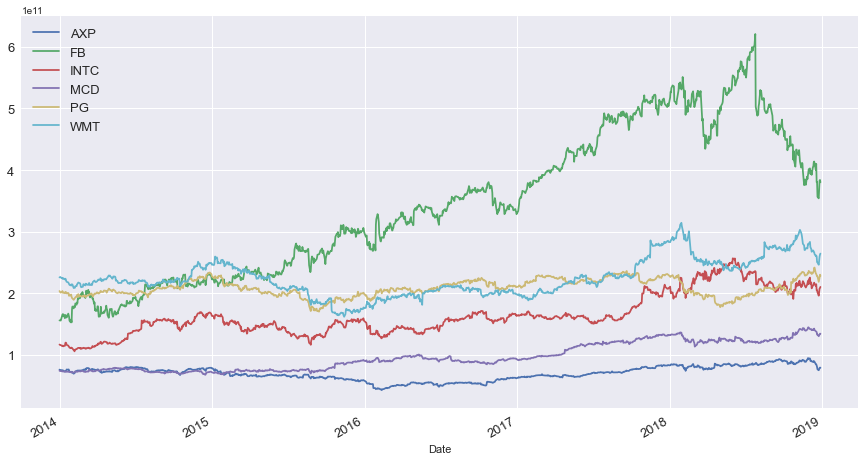

In [21]:
# run the cell!
mcap.plot(figsize = (15, 8 ), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

143. __Calculate__ the __weights__ corresponding to the Market Caps and save the new DataFrame in the variable __weights_vwi__! __Fill in the gaps__!

In [22]:
weights_vwi = mcap.div(mcap.sum(axis = 1), axis = "index")

In [23]:
#run the cell
weights_vwi.head()

,AXP,FB,INTC,MCD,PG,WMT
Date,,,,,,
2013-12-31,0.09,0.18,0.14,0.09,0.24,0.26
2014-01-02,0.09,0.18,0.14,0.09,0.24,0.27
2014-01-03,0.09,0.18,0.14,0.09,0.24,0.27
2014-01-06,0.09,0.19,0.13,0.09,0.24,0.26
2014-01-07,0.09,0.19,0.13,0.09,0.24,0.26


In [24]:
#run the cell
weights_vwi.tail()

,AXP,FB,INTC,MCD,PG,WMT
Date,,,,,,
2018-12-21,0.06,0.29,0.16,0.11,0.18,0.20
2018-12-24,0.06,0.29,0.16,0.11,0.18,0.20
2018-12-26,0.06,0.30,0.16,0.10,0.18,0.20
2018-12-27,0.06,0.30,0.16,0.10,0.18,0.20
2018-12-28,0.06,0.29,0.16,0.10,0.18,0.20


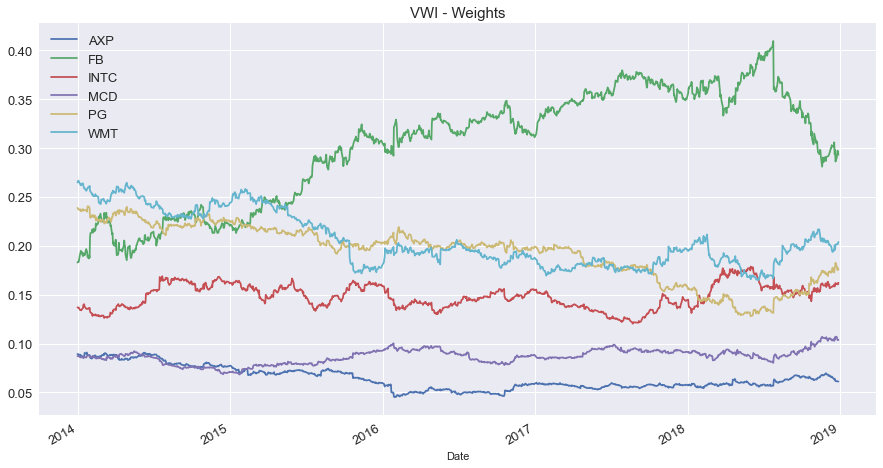

In [25]:
#run the cell!
weights_vwi.plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13)
plt.title("VWI - Weights", fontsize = 15)
plt.show()

In [26]:
#run the cell -> create daily returns
ret = stocks.pct_change().dropna()
ret.head()

,AXP,FB,INTC,MCD,PG,WMT
Date,,,,,,
2014-01-02,-0.01,0.00,-0.01,-0.01,-0.01,0.00
2014-01-03,0.00,-0.00,-0.00,0.00,-0.00,-0.00
2014-01-06,-0.00,0.05,-0.01,-0.01,0.00,-0.01
2014-01-07,-0.00,0.01,0.01,0.01,0.01,0.00
2014-01-08,0.00,0.01,-0.01,-0.01,-0.01,-0.01


In [27]:
#run the cell! -> create column vwi
norm["VWI"] = 100
norm.head()

,AXP,FB,INTC,MCD,PG,WMT,PWI,VWI
Date,,,,,,,,
2013-12-31,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100
2014-01-02,98.59,100.11,99.35,99.36,98.93,100.28,99.38,100
2014-01-03,98.91,99.84,99.31,99.50,98.82,99.95,99.36,100
2014-01-06,98.86,104.67,98.07,98.78,99.05,99.39,99.67,100
2014-01-07,98.49,105.98,98.57,99.33,100.01,99.69,100.15,100


144. __Create__ the vwi by __weighting the returns__ with the __Market Cap weights__ and then __calculating__ the __cumulative Investment Multiple__. <br>
__Fill in the gaps!__

In [28]:
norm.iloc[1:, -1] = ret.mul(weights_vwi.shift().dropna()).sum(axis = 1).add(1).cumprod().mul(100)

In [29]:
norm.head()

,AXP,FB,INTC,MCD,PG,WMT,PWI,VWI
Date,,,,,,,,
2013-12-31,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
2014-01-02,98.59,100.11,99.35,99.36,98.93,100.28,99.38,99.57
2014-01-03,98.91,99.84,99.31,99.50,98.82,99.95,99.36,99.44
2014-01-06,98.86,104.67,98.07,98.78,99.05,99.39,99.67,100.00
2014-01-07,98.49,105.98,98.57,99.33,100.01,99.69,100.15,100.63


145. __Compare__ Price-weighted and Value-weighted Index by creating a __plot__! __Fill in the gaps!__

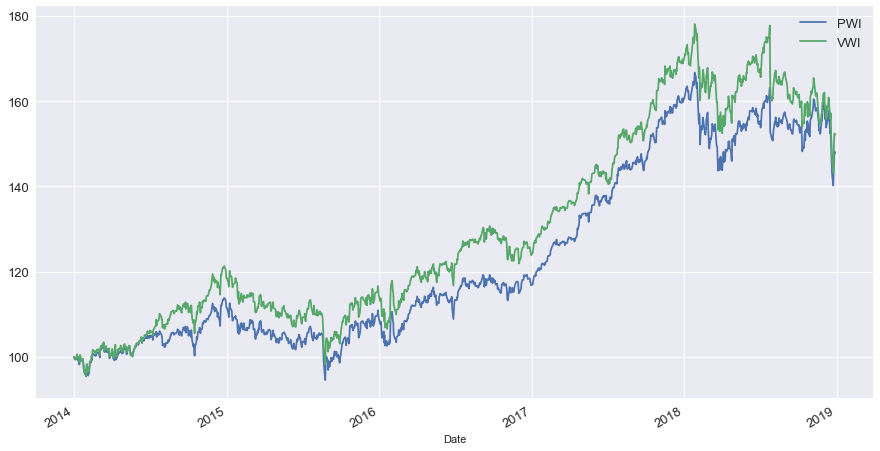

In [30]:
norm.iloc[:, -2:].plot(figsize = (15, 8 ), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

# Well Done!

-------------------

# Hints (Spoiler!)

135. Select the Close Prices

136. stocks = stocks.loc[--- : ---]

137. norm = stocks.---(stocks.iloc[0]).mul(---)

138. plot() method

139. div() and mul() method

140. columns index of stocks, "Last_Price"

141. listings["Shares"] = listings.---.div(listings.---)

142. Multiply stocks prices with the amount of shares

143. div() and sum() method

144. Multiply returns with the weights, cumprod() method

145. plot the last two columns -2: